<div dir="rtl" align="center">
    <h2><strong> HW2: Avoid overfitting through Validation Set </strong></h2>
</div>

Sepehr Moniri -- 981813205

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np

### **Load train and test FasionMNIST dataset**

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.FashionMNIST(
    root='./data/F_MNIST_data/',
    download=True,
    train=True,
    transform=transform
)

testset = datasets.FashionMNIST(
    root='./data/F_MNIST_data/',
    download=True,
    train=False,
    transform=transform
)

# TODO: COMPLETE THIS CODE
BATCH_SIZE = 64

trainloader = DataLoader(
    dataset=trainset,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

testloader = DataLoader(
    dataset=testset,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11199534.34it/s]


Extracting ./data/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202701.85it/s]


Extracting ./data/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3735722.16it/s]


Extracting ./data/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4709329.77it/s]


Extracting ./data/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/F_MNIST_data/FashionMNIST/raw



### **Construct Neural Network Regularized Model**

In [3]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # TODO: COMPLETE THIS CODE
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # TODO: COMPLETE THIS CODE
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

### **Define Criterion and Optimizer**

In [4]:
model = Net()

# TODO: COMPLETE THIS CODE

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### **Training & Evaluating NN Model**

In [5]:
EPOCHS = 10
train_losses, test_losses = list(), list()

for epoch in range(EPOCHS):
    train_loss = 0.0
    test_loss = 0.0
    correct = 0
    total = 0

    model.train()
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    with torch.no_grad():
        for images, labels in testloader:
            output = model(images)
            loss = criterion(output, labels)
            test_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(trainloader))
    test_losses.append(test_loss / len(testloader))
    accuracy = 100 * correct / total
    print(f"Epoch: [{epoch + 1}/{EPOCHS}]\t",
          f"Training Loss: {train_losses[-1]:.3f}\t",
          f"Test Loss: {test_losses[-1]:.3f}\t",
          f"Test Accuracy: {accuracy:.3f}%")

Epoch: [1/10]	 Training Loss: 0.669	 Test Loss: 0.459	 Test Accuracy: 83.570%
Epoch: [2/10]	 Training Loss: 0.507	 Test Loss: 0.428	 Test Accuracy: 84.370%
Epoch: [3/10]	 Training Loss: 0.478	 Test Loss: 0.409	 Test Accuracy: 85.080%
Epoch: [4/10]	 Training Loss: 0.453	 Test Loss: 0.407	 Test Accuracy: 84.580%
Epoch: [5/10]	 Training Loss: 0.439	 Test Loss: 0.390	 Test Accuracy: 85.480%
Epoch: [6/10]	 Training Loss: 0.428	 Test Loss: 0.390	 Test Accuracy: 85.730%
Epoch: [7/10]	 Training Loss: 0.422	 Test Loss: 0.379	 Test Accuracy: 85.900%
Epoch: [8/10]	 Training Loss: 0.408	 Test Loss: 0.368	 Test Accuracy: 86.780%
Epoch: [9/10]	 Training Loss: 0.406	 Test Loss: 0.387	 Test Accuracy: 86.480%
Epoch: [10/10]	 Training Loss: 0.398	 Test Loss: 0.368	 Test Accuracy: 86.690%


### **Plot train and validation losses**

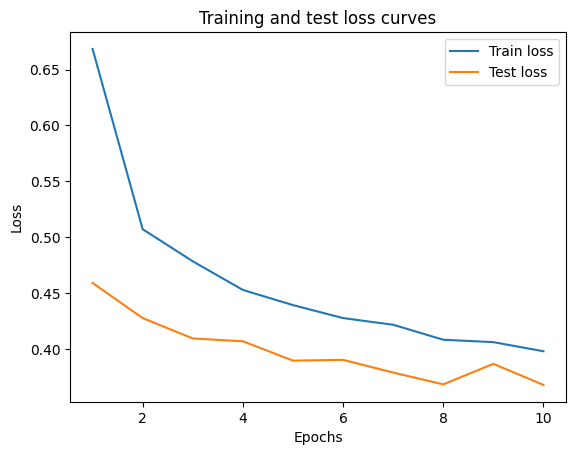

In [6]:
EPOCHS = 10
def learning_curve_plotter(train_losses, test_losses, EPOCH) :
    # plot the learning curves
    plt.plot(np.arange(1, EPOCH+1), train_losses, label="Train loss")
    plt.plot(np.arange(1, EPOCH+1), test_losses, label="Test loss")
    plt.title("Training and test loss curves")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend();

learning_curve_plotter(train_losses, test_losses, EPOCHS)